# Pyhon Básico 


- Manejo de Archivos 
    - Creación/Apertura de Archivos
    - Cierre de Archivos
    - Escritura a Archivos
    - Lectura de Archivos
    - Borrado de Archivos
    - Archivos CSV 
    - Archivos  en  Internet
- Módulos y paquetes


## Directorio de trabajo

El módulo os de Python le permite a usted realizar operaciones dependiente del Sistema Operativo como crear una carpeta, listar contenidos de una carpeta, conocer acerca de un proceso, finalizar un proceso, etc. Este módulo tiene métodos para ver variables de entornos del Sistema Operativo con las cuales Python esta trabajando en mucho más.

Ver  https://docs.python.org/3.8/library/os.html

In [1]:
# se importa el módulo  de manejo del sistema operativo

import os 

In [2]:
#Averigua el directorio de trabajo actual
current_working_directory = os.getcwd()
print(current_working_directory)

c:\Users\sebas\OneDrive\Documents\ICAI\Python Básico 4A-2024\Sesion5


In [3]:
#Cambia el  directorio actual de trabajo
os.chdir('c://util')

In [4]:
current_working_directory = os.getcwd()
print(current_working_directory)

c:\util


# Archivos

### Apertura de archivos



En Python, un archivo físico debe asignarse a un objeto de archivo incorporado con la ayuda de la función **open()**
- Sintaxis general **file_object = open(file name[, access mode])**

donde los modos de acceso pueden ser



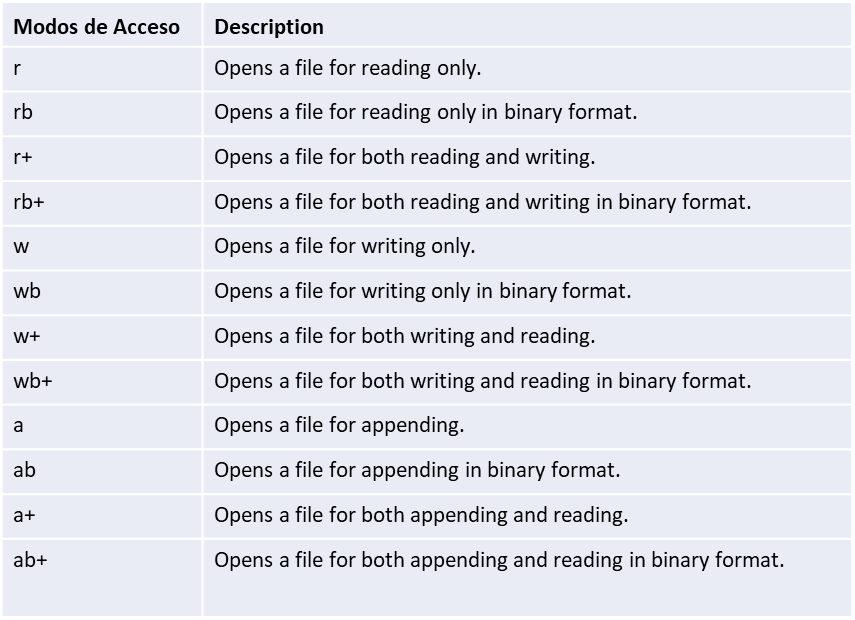

- El modo de acceso escritura  "w" siempre tratará el archivo como un archivo nuevo. 
- Así que  un archivo existente abierto con el modo  escritura "w" perderá su contenido anterior. 
- Para agregar más datos al archivo existente, se debe utilizar  el modo  append o lectura/escritura


In [5]:
# Ejemplo
# sino existe lo crea, dado el parámetro 'w'
archivo = "mi_archivo.txt" 
f=open(archivo,"w")

### Cierre de Archivos

Con el fin de cerra correctamente un archivos , Python hace uso del método **close()**

Sintaxis general **file_object.close()**




In [6]:
#Ejemplo
# cierra el archivo
f.close()

In [11]:
# usando  with statement
# recuerde que aqui esta implicito el close()
with open(current_working_directory + "\\" + archivo, 'w') as file:
    file.write(f'Este es un ejemplo de escritura en el  archivo:\n{archivo}\n')

## Escritura de Archivo 

In [21]:
linea = "Hola.\n"
linea1=["Este es un ejemplo de escritura en el  archivo:\n",archivo+"\n"]
linea2=["Hola nuevamente.\n", "Esta es otra línea insertada en el archivo:\n", archivo]

with open(current_working_directory + "\\" + archivo, 'w') as f:
    # write escribe un string en mi archivo
    f.write(linea)
    # writelines salva una lista de objetos en el archivo 
    f.writelines(linea1)
    f.writelines(linea2)



## Lectura del archivo

In [18]:
with open(current_working_directory + "\\" + archivo, 'r') as f:
    print(f.read())
    

Hola.
Este es un ejemplo de escritura en el  archivo:
mi_archivo.txt
Hola nuevamente.
Esta es otra línea insertada en el archivo:
mi_archivo.txt


In [19]:
# Porque falla ?
with open(current_working_directory + "\\" + archivo, 'w') as f:
    print(f.read())

UnsupportedOperation: not readable

In [22]:
#---------------lectura de archivos con iteración WHILE
with open(current_working_directory + "\\" + archivo, 'r') as f:
    line=f.readline()
    while line!='':
        print(line)
        line=f.readline()


Hola.

Este es un ejemplo de escritura en el  archivo:

mi_archivo.txt

Hola nuevamente.

Esta es otra línea insertada en el archivo:

mi_archivo.txt


In [23]:
#---------------lectura de archivos con iteración FOR
with open(current_working_directory + "\\" + archivo, 'r') as f:
    for linea in f:
        print(linea)
    


Hola.

Este es un ejemplo de escritura en el  archivo:

mi_archivo.txt

Hola nuevamente.

Esta es otra línea insertada en el archivo:

mi_archivo.txt


In [24]:
#---------------- iterando  en un archivo usando NEXT 
with open(current_working_directory + "\\" + archivo, 'r') as f:
    while True:
            try:
                line=next(f)
                print (line)
            except StopIteration: # esta excepción indica que se ha llegado al final de la iteración. 
                break


Hola.

Este es un ejemplo de escritura en el  archivo:

mi_archivo.txt

Hola nuevamente.

Esta es otra línea insertada en el archivo:

mi_archivo.txt


## Append mode

In [26]:

with open(current_working_directory + "\\" + archivo, 'a+') as f:
    f.write("\nHola nuevamente, acabo de incluir una línea nueva al final")
    line=f.readline()


In [28]:
# observamos el nuevo contenido del archivo
with open(current_working_directory + "\\" + archivo, 'r') as f:
    print(f.read())


Hola.
Este es un ejemplo de escritura en el  archivo:
mi_archivo.txt
Hola nuevamente.
Esta es otra línea insertada en el archivo:
mi_archivo.txt
Hola nuevamente, acabo de incluir una línea nueva al final


## Seek en archivo

- En Python, la función seek() se usa para cambiar la posición del controlador de archivo a una posición específica dada. El identificador de archivo es como un cursor, que define desde dónde se deben leer o escribir los datos en el archivo. 

- Sintaxis: f.seek(offset, from_what), donde f es el puntero del archivo
- Parámetros:  
    - Offset: Número de posiciones para avanzar 
    - from_what: Define el punto de referencia.
    - Devuelve: Devuelve la nueva posición absoluta.

El punto de referencia se selecciona mediante el argumento from_what . Acepta tres valores: 
 

- 0: establece el punto de referencia al principio del archivo. Es el default
 
- 1: establece el punto de referencia en la posición actual del archivo 
 
- 2: establece el punto de referencia al final del archivo 

In [30]:

with open(current_working_directory + "\\" + archivo, 'r+') as f:
    #nos posicinamos en la posición 6 del inicio del archivo
    f.seek(6,0)
    # observe que usamos readlines, por lo cual obtuvimos uns lista con todas las líneas del archivo
    lines=f.readlines()
    for line in lines:
        print(line)




Este es un ejemplo de escritura en el  archivo:

mi_archivo.txt

Hola nuevamente.

Esta es otra línea insertada en el archivo:

mi_archivo.txt

Hola nuevamente, acabo de incluir una línea nueva al final


## Lectura y escritura de archivos binarios

In [35]:

with open(current_working_directory + "\\" + "binfile.bin", 'wb') as f:
    num=[5, 10, 15, 20, 25]
    arr=bytearray(num)
    f.write(arr)
# abra el archivo y observe el formato



In [36]:
with open(current_working_directory + "\\" + "binfile.bin", 'rb') as f:
    num=list(f.read())
    print (num)


[5, 10, 15, 20, 25]


### Ejemplo 

In [38]:
# Escribe un mensaje en un archivo
def escribe_archivo(mensaje):
    with open('archivo_comunicacion.txt', 'w') as archivo:
        archivo.write(mensaje)

# Leer el mensaje del fichero        
def lee_archivo():
    mensaje = ""
    with open('archivo_comunicacion.txt', 'r') as archivo:
        mensaje = archivo.read()
    # Borra el contenido del fichero para dejarlo vacío
    f = open('archivo_comunicacion.txt', 'w')
    f.close()
    return mensaje

escribe_archivo("Esto es un mensaje")
print(lee_archivo())

Esto es un mensaje


## Renombrar y borrar Archivos

In [39]:
import os
archivo_ren = 'mi_archivo_renombrado.txt'

if os.path.isfile(archivo):
    os.rename(archivo, archivo_ren) # renombrado
else:
    print('¡El archivo', archivo, 'no existe!')

In [41]:
if os.path.isfile(archivo_ren):
    os.remove(archivo_ren) # borrado
else:
    print('¡El archivo', archivo, 'no existe!')

¡El archivo mi_archivo.txt no existe!


## CSV Files

In [42]:
import csv

In [45]:
# apertura de un archivo csv existente
with open('productos.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        print(type(row))
        print(row)

<class 'list'>
['Ranking', 'Producto', 'NoProducto', 'Marca', 'Rentabilidad Prevista']
<class 'list'>
['1', 'PC', '171', 'Dell', '$204.157 ']
<class 'list'>
['2', 'Laptop', '173', 'Apple', '$140.077 ']
<class 'list'>
['3', 'PC', '172', 'Dell', '$134.927 ']
<class 'list'>
['4', 'Laptop', '176', 'Razer', '$122.662 ']
<class 'list'>
['5', 'Tablet', '186', 'Apple', '$118.297 ']
<class 'list'>
['6', 'Tablet', '187', 'Amazon', '$71.774 ']
<class 'list'>
['7', 'Netbook', '180', 'Acer', '$53.398 ']
<class 'list'>
['8', 'Laptop', '175', 'Toshiba', '$47.982 ']
<class 'list'>
['9', 'Game Console', '199', 'Sony', '$42.314 ']
<class 'list'>
['10', 'Smartphone', '193', 'Motorola', '$23.880 ']
<class 'list'>
['11', 'Netbook', '181', 'Asus', '$16.130 ']
<class 'list'>
['12', 'Smartphone', '196', 'Motorola', '$10.823 ']
<class 'list'>
['13', 'Netbook', '178', 'HP', '$8.867 ']
<class 'list'>
['14', 'Netbook', '183', 'Samsung', '$8.630 ']
<class 'list'>
['15', 'Smartphone', '194', 'Samsung', '$8.161 ']
<

In [47]:
# append en un archivo csv existente por medio de writerow
with open('productos.csv', mode='a+') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',',lineterminator='\n')
    csv_writer.writerow(['18','Impresora','999' ,'Epson','$12.900'])
    csv_writer.writerow(['19', 'Monitor','256','AOC','$10.500'])

In [48]:
with open('productos.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        print(row)

['Ranking', 'Producto', 'NoProducto', 'Marca', 'Rentabilidad Prevista']
['1', 'PC', '171', 'Dell', '$204.157 ']
['2', 'Laptop', '173', 'Apple', '$140.077 ']
['3', 'PC', '172', 'Dell', '$134.927 ']
['4', 'Laptop', '176', 'Razer', '$122.662 ']
['5', 'Tablet', '186', 'Apple', '$118.297 ']
['6', 'Tablet', '187', 'Amazon', '$71.774 ']
['7', 'Netbook', '180', 'Acer', '$53.398 ']
['8', 'Laptop', '175', 'Toshiba', '$47.982 ']
['9', 'Game Console', '199', 'Sony', '$42.314 ']
['10', 'Smartphone', '193', 'Motorola', '$23.880 ']
['11', 'Netbook', '181', 'Asus', '$16.130 ']
['12', 'Smartphone', '196', 'Motorola', '$10.823 ']
['13', 'Netbook', '178', 'HP', '$8.867 ']
['14', 'Netbook', '183', 'Samsung', '$8.630 ']
['15', 'Smartphone', '194', 'Samsung', '$8.161 ']
['16', 'Smartphone', '195', 'HTC', '$6.214 ']
['17', 'Monitor', '201', 'Asus', '$1.867 ']
['18', 'Impresora', '999', 'Epson', '$12.900']
['19', 'Monitor', '256', 'AOC', '$10.500']
['18', 'Impresora', '999', 'Epson', '$12.900']
['19', 'Monito

## Lectura de archivos en Internet

- utilizando urlopen()

In [1]:
from urllib import request
from urllib.error import URLError

In [2]:
url = 'https://docs.python.org/3/library/urllib.html'
f = request.urlopen(url)

In [3]:
line  = f.readline().decode('utf-8')
while(line != ''):
    print(line)
    line = f.readline().decode('utf-8')

<!DOCTYPE html>



<html lang="en" data-content_root="../">

  <head>

    <meta charset="utf-8" />

    <meta name="viewport" content="width=device-width, initial-scale=1.0" /><meta name="viewport" content="width=device-width, initial-scale=1" />

<meta property="og:title" content="urllib — URL handling modules" />

<meta property="og:type" content="website" />

<meta property="og:url" content="https://docs.python.org/3/library/urllib.html" />

<meta property="og:site_name" content="Python documentation" />

<meta property="og:description" content="Source code: Lib/urllib/ urllib is a package that collects several modules for working with URLs: urllib.request for opening and reading URLs, urllib.error containing the exceptions raised by urlli..." />

<meta property="og:image" content="https://docs.python.org/3/_static/og-image.png" />

<meta property="og:image:alt" content="Python documentation" />

<meta name="description" content="Source code: Lib/urllib/ urllib is a package that co

In [9]:
# Funcion ejemplo 
def get_name(url, name='Juego de tronos'):
    try:
        f = request.urlopen(url)
    except URLError:
        return('¡La url ' + url + ' no existe!')
    else:
        line  = f.readline().decode('utf-8')
        while(line != ''):
            if  name in line:
                return line
            line = f.readline().decode('utf-8')
    #return data

In [11]:
# datasource con informacion del PIB de los paises de la UE
#url_ = 'https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/sdg_08_10.tsv.gz&unzip=true'
url_ = 'https://es.wikipedia.org/wiki/Juego_de_tronos'
get_name(url_, "Stark")

'<p><a href="/wiki/Eddard_Stark" title="Eddard Stark">Eddard Stark</a>, como Señor de <a href="/wiki/Poniente_(Canci%C3%B3n_de_Hielo_y_Fuego)" class="mw-redirect" title="Poniente (Canción de Hielo y Fuego)">Invernalia</a>, en nombre de Robert I Baratheon, rey de los Siete Reinos, debe condenar y ejecutar a un desertor de la <a href="/wiki/Guardia_de_la_Noche" title="Guardia de la Noche">Guardia de la Noche</a>. Algunos de sus hijos se encuentran entre los testigos. En el viaje de vuelta a Invernalia (Winterfell), los hijos de Eddard descubren cinco cachorros de lobo huargo al lado de su madre muerta, uno para cada uno de sus hijos legítimos y otro cachorro totalmente blanco, que se queda su bastardo Jon Nieves  (el lobo huargo es el símbolo de la Casa Stark, que aparece en la heráldica de la familia Stark). Después de la muerte de Lord <a href="/wiki/Casa_Arryn" title="Casa Arryn">Jon Arryn</a>, anterior "Mano del Rey" (el más alto asesor del rey), el rey <a href="/wiki/Casa_Baratheon"

# Módulos y Paquetes

- Los módulos y paquetes en Python son la forma de organizar los scripts y programas a medida que estos crecen en número de líneas de código. Por otro lado, un espacio de nombres define los límites en que se puede utilizar un nombre o identificador determinado.

- Un módulo es una pieza de software que tiene una funcionalidad específica.
- Los módulos en Python son simplemente archivos Python con una extensión .py
- El nombre del módulo será el nombre del archivo
- Un módulo de Python puede tener un conjunto de funciones, clases o variables definidas e implementadas
- Referencias 
  -   https://docs.python.org/3/tutorial/modules.html
  -   https://docs.python.org/3/glossary.html#term-module



ir a https://j2logo.com/python/tutorial/espacios-de-nombres-modulos-y-paquetes/

para completar la lección

## Espacio de Nombres

- Recuerde: Todo en Python son Objetos
- Un espacio de nombres es una colección aislada de nombres (o identificadores) que referencian a objetos. 
- En un script o programa Python pueden coexistir varios espacios de nombres a la vez
- En el  intérprete de Python o al ejecutar un programa, todos los identificadores que define el lenguaje son añadidos a un espacio de nombres al que es posible acceder desde cualquier punto de un script. Es por esto que las funciones como print() o len() están siempre accesibles. 
- Este espacio de nombres es conocido como espacio de nombres incorporado o built-in namespace

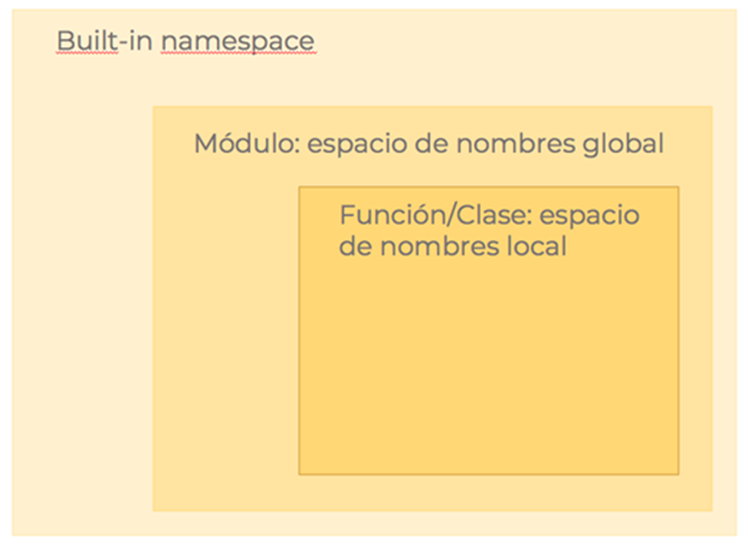


## Módulos

En Python, un módulo no es más que un archivo que contiene instrucciones y definiciones (variables, funciones, clases, …). El archiov debe tener extensión .py y su nombre se corresponde con el nombre del módulo.

- Ahora, cuando se crea un  módulo , en el existen funciones y clases. Cuando se invoca a una función se crea un espacio de nombres local asociado a dicha función que contiene todos los nombres definidos dentro de la misma.
- Lo mismo sucede con las clases


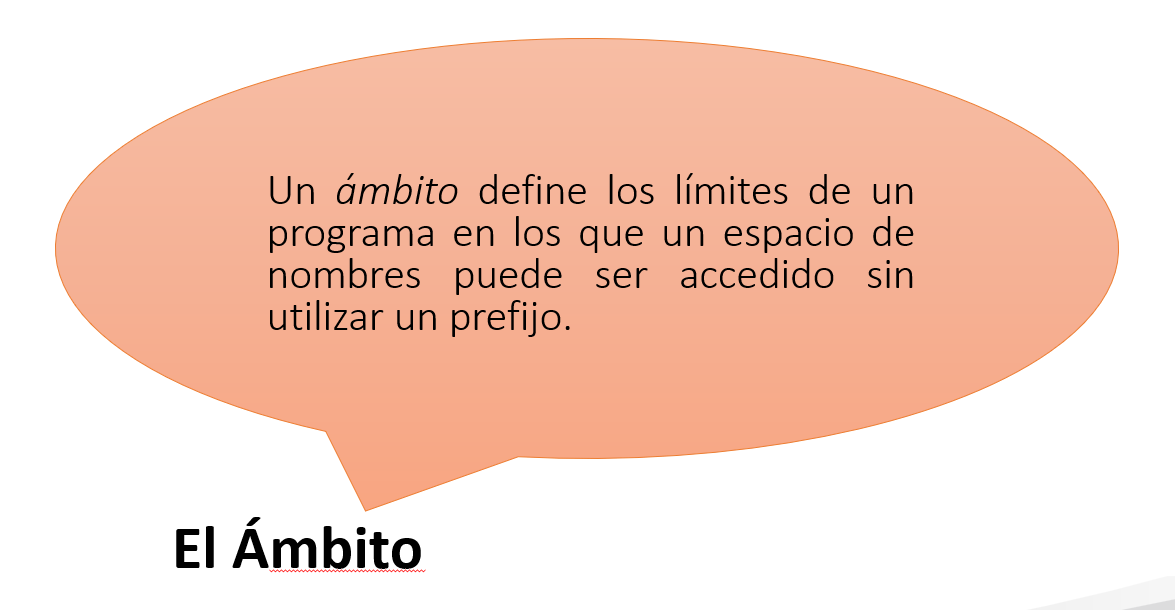

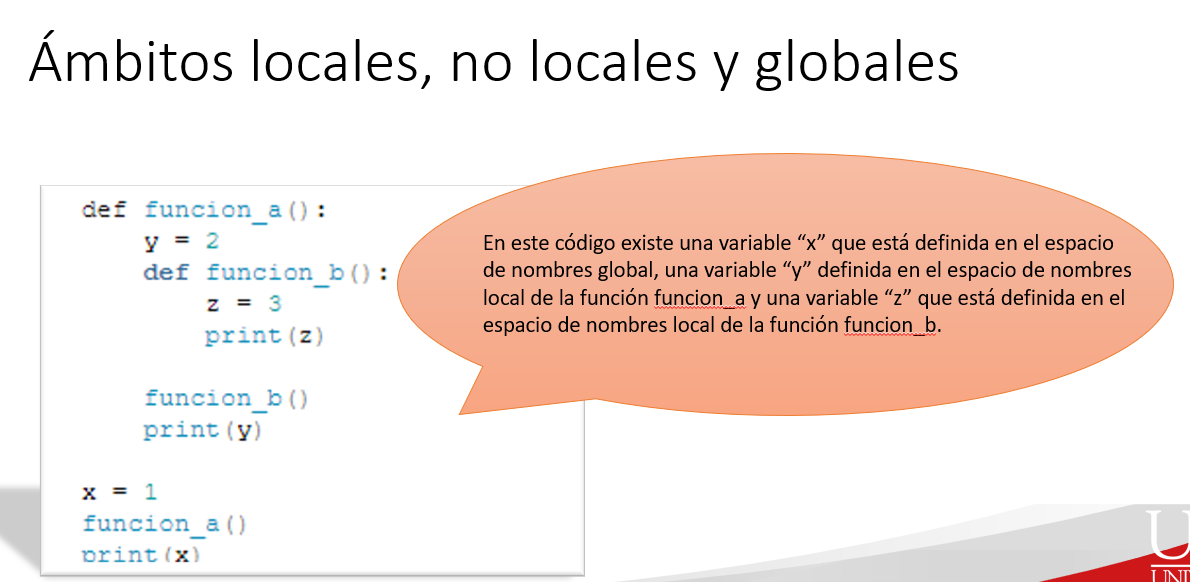

Ver detalles en https://docs.python.org/3/reference/simple_stmts.html#the-import-statement

Lista de módulos en Python 
- https://docs.python.org/3/py-modindex.html


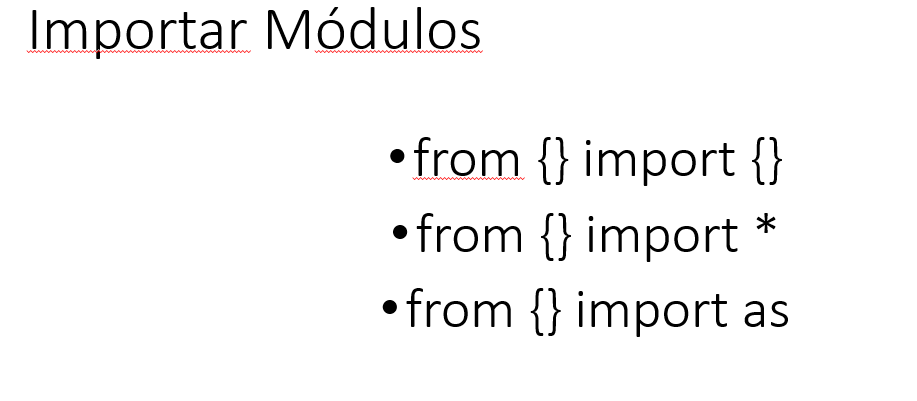

La función dir() devuelve una lista con todas las definiciones (variables, funciones, clases, …) contenidas en un módulo

In [57]:
import os
dir() # show the names in the module namespace  

['In',
 'Out',
 'URLError',
 '_',
 '_53',
 '_55',
 '_56',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'archivo',
 'archivo_ren',
 'arr',
 'csv',
 'csv_file',
 'csv_reader',
 'csv_writer',
 'current_working_directory',
 'escribe_archivo',
 'exit',
 'f',
 'file',
 'get_ipython',
 'get_pib',
 'lee_archivo',
 'line',
 'linea',
 'linea1',
 'linea2',
 'li

In [58]:
dir(os)   # show the names in the struct module

['DirEntry',
 'EX_OK',
 'F_OK',
 'GenericAlias',
 'Mapping',
 'MutableMapping',
 'O_APPEND',
 'O_BINARY',
 'O_CREAT',
 'O_EXCL',
 'O_NOINHERIT',
 'O_RANDOM',
 'O_RDONLY',
 'O_RDWR',
 'O_SEQUENTIAL',
 'O_SHORT_LIVED',
 'O_TEMPORARY',
 'O_TEXT',
 'O_TRUNC',
 'O_WRONLY',
 'P_DETACH',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_OVERLAY',
 'P_WAIT',
 'PathLike',
 'R_OK',
 'SEEK_CUR',
 'SEEK_END',
 'SEEK_SET',
 'TMP_MAX',
 'W_OK',
 'X_OK',
 '_AddedDllDirectory',
 '_Environ',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_methods',
 '_execvpe',
 '_exists',
 '_exit',
 '_fspath',
 '_get_exports_list',
 '_walk_symlinks_as_files',
 '_wrap_close',
 'abc',
 'abort',
 'access',
 'add_dll_directory',
 'altsep',
 'chdir',
 'chmod',
 'close',
 'closerange',
 'cpu_count',
 'curdir',
 'defpath',
 'device_encoding',
 'devnull',
 'dup',
 'dup2',
 'environ',
 'error',
 'execl',
 'execle',
 'execlp',
 'execlpe',
 'execv',
 'execve',
 'execvp',
 'exe

In [59]:
class Shape:
    def __dir__(self):
        return ['area', 'perimeter', 'location']

s = Shape()
dir(s)

['area', 'location', 'perimeter']

## Paquetes

- Del mismo modo en que agrupamos las funciones y demás definiciones en módulos, los paquetes en Python permiten organizar y estructurar de forma jerárquica los diferentes módulos que componen un programa. Además, los paquetes hacen posible que existan varios módulos con el mismo nombre y que no se produzcan errores.

- Un paquete es simplemente un directorio que contiene otros paquetes y módulos. Además, en Python, para que un directorio sea considerado un paquete, este debe incluir un módulo llamado __init__.py. En la mayoría de ocasiones, el fichero __init__.py estará vacío, sin embargo, se puede utilizar para inicializar código relacionado con el paquete.

- Al igual que sucede con los módulos, cuando se importa un paquete, Python busca a través de los directorios definidos en sys.path el directorio perteneciente a dicho paquete.

- Para que lo veas todo de forma gráfica, te muestro los conceptos con una imagen. Imagina que estás haciendo una aplicación para gestionar pedidos. Una forma de organizar los diferentes módulos podría ser la siguiente:

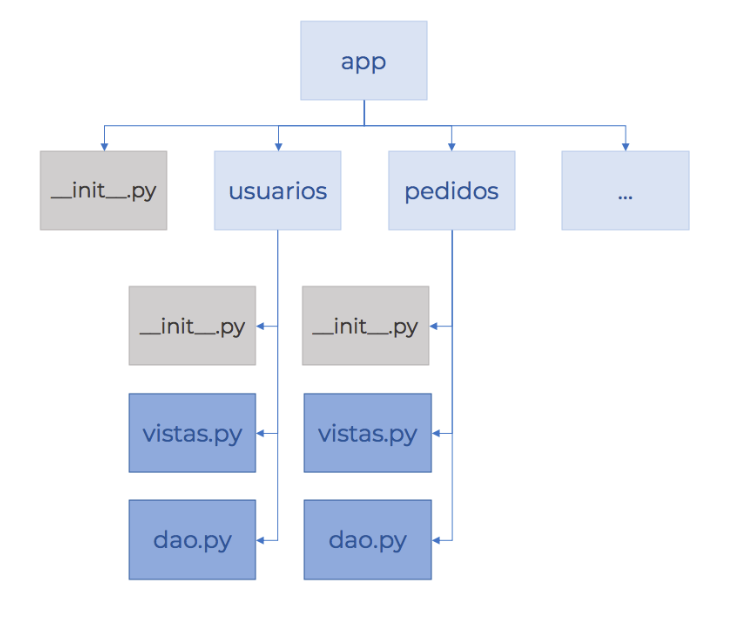